In [19]:
%ls

1erNovembre2.csv      2NovembreBesac.csv    mix.csv
1erNovembre3.csv      ChallengeIA.ipynb     model/
2018-11-02 16:41.csv  README.md             model.png
2018-11-03 18:09.csv  data_airbus_defi/     model_plot.png
2018-11-05 16:18.csv  essais.ipynb


In [20]:
liste = [#"1erNovembre2.csv",
#"1erNovembre3.csv",
"2018-11-02 16:41.csv",
"2NovembreBesac.csv",
"2018-11-05 16:18.csv"]

In [21]:
pds = []
for l in liste:
    pds.append(pd.read_csv(l, sep = ";"))

In [22]:
def cut_half(x):
    if x < .5:
        return 0
    else:
        return 1
pred = list((pds[0]["prediction"] + pds[1]["prediction"] + pds[2]["prediction"])/3)
prediction = [cut_half(x) for x in pred]

In [23]:
pds[0]["prediction"] = prediction
p =pds[0]

In [24]:
p.set_index("name", inplace=True)

In [25]:
p.to_csv("mix5-11.csv",sep=";")

In [28]:
def windmill_model(x_train, y_train, x_val, y_val, params):

    conv2Dsize = 12
    pool_size = (2,2)
    
    modelBW = Sequential()
    modelBW.add(Conv2D(conv2Dsize, (4,4), input_shape = input_shape, activation = params['activation']))
    modelBW.add(Conv2D(12, pool_size, activation = params['activation']))
    modelBW.add(Conv2D( 6, (2,2), activation = 'relu'))
    modelBW.add(MaxPooling2D(pool_size = (2,2)))
    modelBW.add(Dropout(params['dropout']))
    modelBW.add(Conv2D(conv2Dsize, (3, 3), activation = 'relu'))
    modelBW.add(MaxPooling2D(pool_size = pool_size))
    modelBW.add(Dropout(params['dropout']))
    modelBW.add(Flatten())
    modelBW.add(Dense(units = params["hidden_layers"], activation = 'sigmoid'))
    modelBW.add(Dense(units = 1, activation = 'sigmoid'))

    modelBW.compile(loss=params['losses'],
                  optimizer=params['optimizer'],
                  metrics=['acc'])    # next we can build the model exactly like we would normally do it

    
    history = modelBW.fit(x_train, y_train, 
                        validation_split=.1,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0)
    
    # finally we have to make sure that history object and model are returned
    return history, model

In [29]:
p = {'lr': (0.5, 5, 10),
     'first_neuron':[4, 8, 16, 32, 64],
     'hidden_layers':[0, 1, 2],
     'batch_size': (2, 30, 10),
     'epochs': [150],
     'dropout': (0, 0.5, 5),
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick','long_funnel'],
     'optimizer': ["adam", "SGD", "RMSprop"],
     'losses': ["logcosh", "binary_crossentropy"],
     'activation':["relu", "elu"],
     'last_activation': ["sigmoid"]}

In [30]:
import talos as ta
t = ta.Scan(x=XTRAIN,
            y=train_labels,
            model=windmill_model,
            grid_downsample=0.01, 
            params=p,
            dataset_name='breast_cancer',
            experiment_no='1')







  0%|          | 0/1800 [00:00<?, ?it/s]

NameError: name 'model' is not defined

In [1]:
import warnings
warnings.filterwarnings("ignore")
import random
from copy import deepcopy as dp
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from tqdm import *
import os 
from os import system
import numpy as np 
from keras.preprocessing import image
from keras.initializers import RandomNormal as RN
from PIL import Image
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from matplotlib import pyplot as plt
from datetime import datetime
import glob
import numpy as np
import os.path as path
from scipy import misc

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import accuracy_score, f1_score
from datetime import datetime

Using TensorFlow backend.


In [2]:
size = 128
#img_width, img_height = size, size

data_train_path_target = "data_airbus_defi/train/"
data_test_path = "data_airbus_defi/test/"
input_shape = (size, size, 3)
#imput_shape = (size,size,1)

In [4]:
PATH = os.getcwd()
full = False
some = False
if full:
    training_size = float("inf")
    testing_size = float("inf")
elif some:
    training_size = 1000
    testing_size = float("inf")
else:
    training_size = 100
    testing_size = 100
    

train_path = PATH +"/" + data_train_path_target + "target/"
train_data_target = os.listdir(train_path)
x_train = []




#im_train = []
tdt = 0
for sample in (train_data_target):
    img_path = train_path+sample
    x = image.load_img(img_path)
    # preprocessing if required
    x_train.append(np.array(x))
    
    """
    im = Image.open(img_path)
    im_grey = im.convert('L') # convert the image to *greyscale*
    #im_bw = im_grey.point(lambda x: 0 if x<128 else 255, '1')
    im_array = np.array(im_grey)
    im_train.append(im_array)
    """
    tdt += 1
    
    if tdt > training_size:
        break

train_path = PATH +"/" + data_train_path_target + "other/"
train_data_other = os.listdir(train_path)
x_train2 = []
im_train2 = []
tdo = 0
for sample in (train_data_other):
    img_path = train_path+sample
    x = image.load_img(img_path)
    # preprocessing if required
    x_train2.append(np.array(x))
    """
    im = Image.open(img_path)
    im_grey = im.convert('L') # convert the image to *greyscale*
    #im_bw = im_grey.point(lambda x: 0 if x<128 else 255, '1')
    im_array = np.array(im_grey)
    im_train2.append(im_array)
    """
    tdo += 1
    if tdo > training_size:
        break

    
test_path = PATH+'/data_airbus_defi/test/'
test_data = os.listdir(test_path)
x_test = []
#im_test = []


td = 0
output = pd.DataFrame(columns=["name"])
test_data = [str(x) + ".jpg" for x in range(len(test_data))]
for sample in (test_data):
    output.append({"name": sample},ignore_index=True)
    #print(sample)
    img_path = test_path+sample
    x = image.load_img(img_path)
    # preprocessing if required
    x_test.append(np.array(x))
    """
    im = Image.open(img_path)
    im_grey = im.convert('L') # convert the image to *greyscale*
    #im_bw = im_grey.point(lambda x: 0 if x<128 else 255, '1')
    im_array = np.array(im_grey)
    im_test.append(im_array)
    """
    td+=1
    if td > testing_size:
        break
    
    
#test = np.array([np.array(x_t) for x_t in x_test])
# finally converting list into numpy array
x_train = np.array(x_train)
x_train2 = np.array(x_train2)
x_test = np.array(x_test) / 255.
XTRAIN = np.concatenate((x_train, x_train2), axis=0) / 255.

In [5]:
train_label1 = np.array([1] * x_train.shape[0] + [0] * x_train2.shape[0])

In [6]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]
XTRAIN, train_labels = unison_shuffled_copies(XTRAIN,train_label1)
#IMTRAIN, im_labels = unison_shuffled_copies(IMTRAIN,train_labels)
#XTRAIN, train_labels  = zip(*random.shuffle(list(zip(XTRAIN,train_label1))))

In [7]:
system('say Data mélangée!')

0

In [8]:
def visualize_incorrect_labels(x_data, y_real, y_predicted):
    # INPUTS
    # x_data      - images
    # y_data      - ground truth labels
    # y_predicted - predicted label
    count = 0
    figure = plt.figure()
    incorrect_label_indices = (y_real != y_predicted)
    y_real = y_real[incorrect_label_indices]
    y_predicted = y_predicted[incorrect_label_indices]
    x_data = x_data[incorrect_label_indices, :, :, :]

    maximum_square = np.ceil(np.sqrt(x_data.shape[0]))

    for i in range(x_data.shape[0]):
        count += 1
        figure.add_subplot(maximum_square, maximum_square, count)
        plt.imshow(x_data[i, :, :, :])
        plt.axis('off')
        plt.title("Predicted: " + str(int(y_predicted[i])) + ", Real: " + str(int(y_real[i])), fontsize=10)

    plt.show()

#visualize_incorrect_labels(XTRAIN, train_labels, np.zeros(train_labels.shape[0]))

In [9]:
train_labels.shape

(202,)

In [10]:
np.zeros(train_labels.shape[0])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam, RMSprop

In [29]:

class GAN(object):
    def __init__(self, width = size, height=size, channels =3):
        self.WIDTH = width
        self.HEIGHT = height
        self.CHANNELS = channels
        self.SHAPE = (self.WIDTH, self.HEIGHT, self.CHANNELS)
        self.OPTIMIZER = Adam(lr=0.0002, decay=8e-9)
        self.noise_gen = np.random.normal(0,1,(100,))
        self.G = self.generator()
        self.G.compile(loss='binary_crossentropy', optimizer=self.OPTIMIZER)
        self.D = self.discriminator()
        self.D.compile(loss='binary_crossentropy', optimizer=self.OPTIMIZER, metrics=['accuracy'] )
        self.stacked_G_D = self.stacked_G_D()
        self.stacked_G_D.compile(loss='binary_crossentropy', optimizer=self.OPTIMIZER)
    def generator(self):
        model = Sequential()
        model.add(Dense(12, input_shape=(100,)))
        ## 256
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(8))
        ## 512
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(2))
        ## 1024
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(self.WIDTH * self.HEIGHT * self.CHANNELS, activation='tanh'))
        model.add(Reshape((self.WIDTH, self.HEIGHT, self.CHANNELS)))    
        return model
    def discriminator(self):
        model = Sequential()
        model.add(Flatten(input_shape=self.SHAPE))
        model.add(Dense((12), input_shape=self.SHAPE))
        ## self.WIDTH * self.HEIGHT * self.CHANNELS
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(12))
        ## int((self.WIDTH * self.HEIGHT * self.CHANNELS)/2)
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        return model
    def stacked_G_D(self):
        self.D.trainable = False
        model = Sequential()
        model.add(self.G)
        model.add(self.D)
        return model

    def train(self, X_train, epochs=2, batch = 32, save_interval = 1):
        ## epochs = 20000
        for cnt in range(epochs):
            ## train discriminator
            random_index =  np.random.randint(0, len(X_train) - batch/2)
            print(XTRAIN.shape)
            legit_images = X_train[random_index : int(random_index + batch/2)].reshape(int(batch/2), self.WIDTH, self.HEIGHT, self.CHANNELS)
            gen_noise = np.random.normal(0, 1, (int(batch/2),100))
            syntetic_images = self.G.predict(gen_noise)
            x_combined_batch = np.concatenate((legit_images, syntetic_images))
            y_combined_batch = np.concatenate((np.ones((int(batch/2), 1)), np.zeros((int(batch/2), 1))))
            d_loss = self.D.train_on_batch(x_combined_batch, y_combined_batch)
            # train generator
            noise = np.random.normal(0, 1, (batch,100))
            y_mislabled = np.ones((batch, 1))
            g_loss = self.stacked_G_D.train_on_batch(noise, y_mislabled)
            print ('epoch: %d, [Discriminator :: d_loss: %f], [ Generator :: loss: %f]' % (cnt, d_loss[0], g_loss))

            if cnt % save_interval == 0 : 
                self.plot_images(save2file=True, step=cnt)
    def plot_images(self, save2file=False,  samples=4, step=0):
        filename = "./images/mnist_%d.png" % step
        noise = np.random.normal(0, 1, (samples,100))
        images = self.G.predict(noise)

        plt.figure(figsize=(10,10))

        for i in range(images.shape[0]):
            plt.subplot(4, 4, i+1)
            image = images[i, :, :, :]
            #print(image.shape)
            #image = np.reshape(image, [ self.HEIGHT, self.WIDTH ])
            #plt.imshow(image, cmap='gray')
            plt.imshow(image)
            plt.axis('off')
            plt.tight_layout()
        if False:#save2file:
            plt.savefig(filename)
            plt.close('all')
        else:
            plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_54 (Dense)             (None, 12)                589836    
_________________________________________________________________
leaky_re_lu_39 (LeakyReLU)   (None, 12)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 12)                156       
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 12)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 13        
Total params: 590,005
Trainable params: 590,005
Non-trainable params: 0
_________________________________________________________________
(202

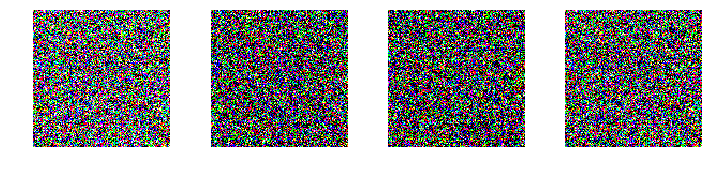

(202, 128, 128, 3)
epoch: 1, [Discriminator :: d_loss: 0.357570], [ Generator :: loss: 0.682652]


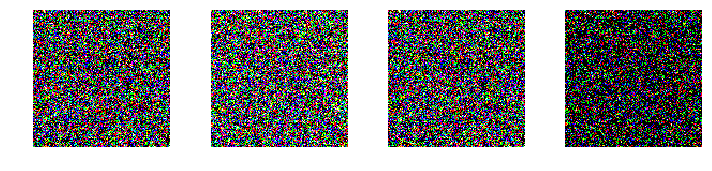

In [30]:
gan = GAN()
gan.train(XTRAIN)

In [19]:
128 * 128 * 3

49152

In [11]:
def generator(self):
    model = Sequential()
    model.add(Dense(256, input_shape=(100,)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(self.WIDTH * self.HEIGHT * self.CHANNELS, activation='tanh'))
    model.add(Reshape((self.WIDTH, self.HEIGHT, self.CHANNELS)))
        
    return model

In [12]:
def discriminator(self):
    model = Sequential()
    model.add(Flatten(input_shape=self.SHAPE))
    model.add(Dense((self.WIDTH * self.HEIGHT * self.CHANNELS), input_shape=self.SHAPE))
        
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense((self.WIDTH * self.HEIGHT * self.CHANNELS)/2))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model

In [14]:
def __init__(self, width = size, height= size, channels = 3):
    self.WIDTH = width
    self.HEIGHT = height
    self.CHANNELS = channels
    self.SHAPE = (self.WIDTH, self.HEIGHT, self.CHANNELS)
    self.OPTIMIZER = Adam(lr=0.0002, decay=8e-9)
    self.noise_gen = np.random.normal(0,1,(100,))
    self.G = self.generator()
    self.G.compile(loss='binary_crossentropy', \
        optimizer=self.OPTIMIZER)
    self.D = self.discriminator()
    self.D.compile(loss='binary_crossentropy', \
        optimizer=self.OPTIMIZER, metrics=['accuracy'])

In [15]:
def stacked_G_D(self):
    self.D.trainable = False ## this freezes the weight, keep  
                             ## reading to understand why this is
                             ## necessary
    model = Sequential()
    model.add(self.G)
    model.add(self.D)
    return model
### I need to compile the stacked model, so that a new instance of
### the discriminator is created with the frozen parameters. 
self.stacked_G_D = self.stacked_G_D()
self.stacked_G_D.compile(loss='binary_crossentropy', \
     optimizer=self.OPTIMIZER)

NameError: name 'self' is not defined

In [10]:
EPOCHS = 150
BATCH_SIZE = 200

In [39]:
def cnn(size, n_layers):
    # INPUTS
    # size     - size of the input images
    # n_layers - number of layers
    # OUTPUTS
    # model    - compiled CNN

    # Define hyperparamters
    MIN_NEURONS = 3
    MAX_NEURONS = 6
    KERNEL = (3, 3)

    # Determine the # of neurons in each convolutional layer
    steps = np.floor(MAX_NEURONS / (n_layers + 1))
    nuerons = np.arange(MIN_NEURONS, MAX_NEURONS, steps)
    nuerons = nuerons.astype(np.int32)

    # Define a model
    model = Sequential()

    # Add convolutional layers
    for i in range(0, n_layers):
        if i == 0:
            shape = (size[0], size[1], size[2])
            model.add(Conv2D(nuerons[i], KERNEL, input_shape=shape))
        else:
            model.add(Conv2D(nuerons[i], KERNEL))

        model.add(Activation('relu'))

    # Add max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(MAX_NEURONS))
    model.add(Activation('relu'))

    # Add output layer
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    # Print a summary of the model
    model.summary()

    return model

In [40]:
model = cnn(size=input_shape, n_layers=3)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 3)       84        
_________________________________________________________________
activation_11 (Activation)   (None, 126, 126, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 124, 124, 4)       112       
_________________________________________________________________
activation_12 (Activation)   (None, 124, 124, 4)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 122, 122, 5)       185       
_________________________________________________________________
activation_13 (Activation)   (None, 122, 122, 5)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 61, 61, 5)         0         
__________

In [41]:
EPOCHS = 2
BATCH_SIZE = 200
PATIENCE = 10
early_stopping = EarlyStopping(monitor='loss', min_delta=0, patience=PATIENCE, verbose=0, mode='auto')

In [42]:
PATIENCE = 10
early_stopping = EarlyStopping(monitor='loss', min_delta=0, patience=PATIENCE, verbose=0, mode='auto')
LOG_DIRECTORY_ROOT = ''
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
log_dir = "TF" + now
tensorboard = TensorBoard(log_dir=log_dir, write_graph=True, write_images=True)
callbacks = [early_stopping, tensorboard]

In [44]:
model.fit(XTRAIN, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks, verbose=0)

In [45]:
now

'20181103094232'

In [ ]:
## tensorboard --logdir TF2018......